In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import pandas as pd

from lib.lif import LIF, ParamsLIF, LSM, ParamsLSM

Populating the interactive namespace from numpy and matplotlib


In [2]:
params = ParamsLSM(q = 100, p = 1, t = 1)
lsm = LSM(params)

lib/lif.py:131: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ex = rand.choice(q, q_e, replace=False)
lib/lif.py:135: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  conn = rand.choice(q, m, replace=False)
lib/lif.py:136: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  weights = np.maximum(rand.randn(m)*sigma_w + mu_w, 0)
lib/lif.py:141: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ex = rand.choice(q, np.ceil(0.5*q), replace=False)


In [3]:
s_out = lsm.simulate(2)

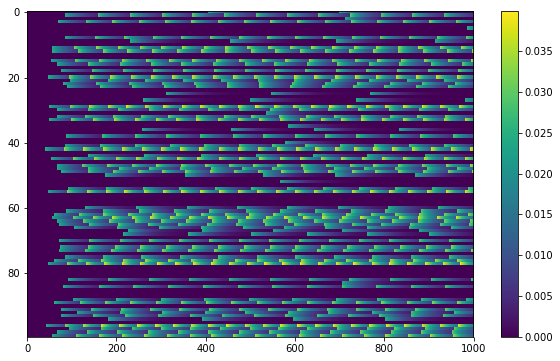

In [4]:
a=plt.imshow(s_out, aspect='auto')
plt.colorbar(a)

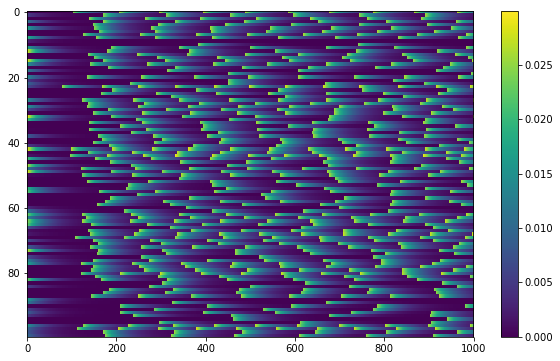

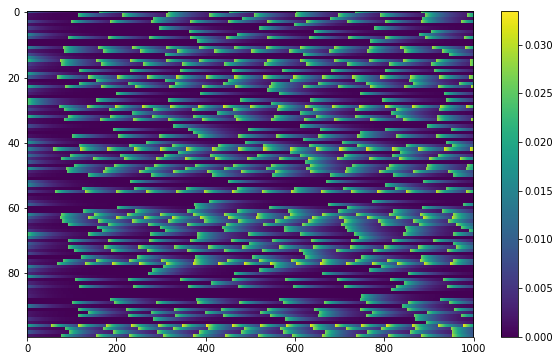

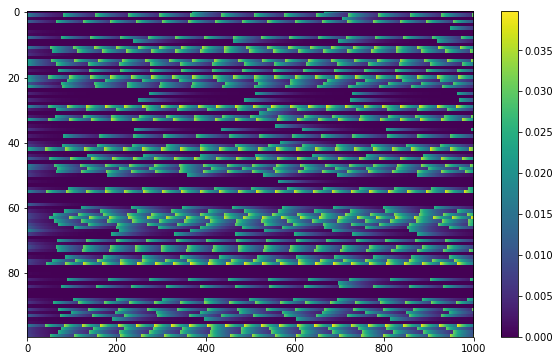

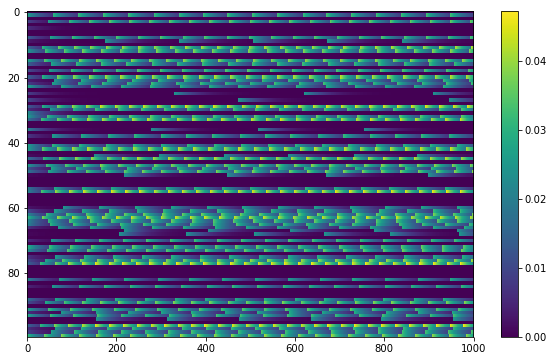

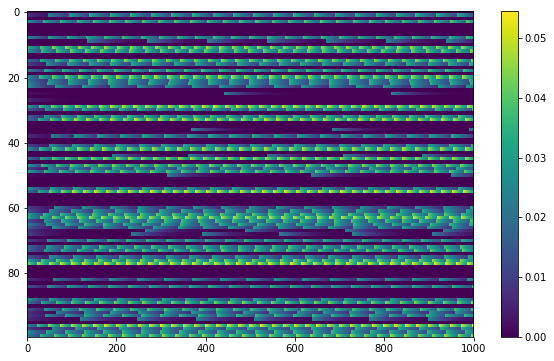

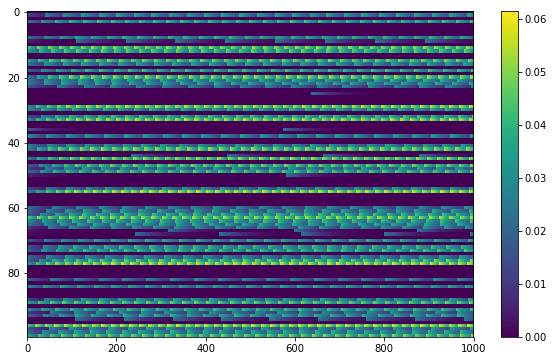

In [11]:
N = 6
s_outs = np.zeros((s_out.shape[0], s_out.shape[1], N))
for x in range(N):
    s_out = lsm.simulate(x)
    fig, ax = plt.subplots(1,1)
    a=ax.imshow(s_out, aspect='auto')
    plt.colorbar(a)

What are the eigenvalues of the connectivity matrix?

In [5]:
J = lsm.W
w,v = np.linalg.eig(J)

In [6]:
w

array([ 297.66520631  +0.j        ,  203.79465927  +0.j        ,
        156.71163983 +92.47462512j,  156.71163983 -92.47462512j,
       -135.70029432+117.00954564j, -135.70029432-117.00954564j,
        158.49126297 +46.33378748j,  158.49126297 -46.33378748j,
       -172.16666897  +8.42002421j, -172.16666897  -8.42002421j,
         70.71054292+151.51865187j,   70.71054292-151.51865187j,
         50.27068978+160.47525371j,   50.27068978-160.47525371j,
        152.05382656  +0.j        ,  -24.90762449+164.87493014j,
        -24.90762449-164.87493014j,  104.80434660+117.00493934j,
        104.80434660-117.00493934j,   15.06949429+164.82306293j,
         15.06949429-164.82306293j,  130.54980926 +77.50938407j,
        130.54980926 -77.50938407j,   72.63644394+135.17552319j,
         72.63644394-135.17552319j,  141.01661344  +0.j        ,
       -112.26260661+117.60093613j, -112.26260661-117.60093613j,
        -43.92306617+148.4705218j ,  -43.92306617-148.4705218j ,
       -146.75607663 +39.

In [12]:
s_outs.shape

(100, 1000, 6)

In [13]:
u,d,v = np.linalg.svd(s_out.reshape(100,-1))

In [14]:
d.shape

(100,)

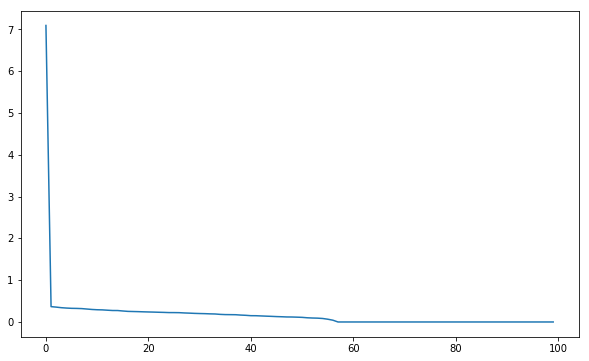

In [15]:
plt.plot(d)

Currently, pretty one dimensional...